### Parte Prática 2: agrupamentos (clusterings)

#### Brazilian Symposium on Bioinformatics (BSB) 2023

Copyright (C) 2023 Marcelo S. Reis, Ronaldo Nogueira and Cristiano Campos.

<a href="mailto:msreis@ic.unicamp.br">msreis@ic.unicamp.br</a>

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see http://www.gnu.org/licenses/.

Hoje vamos implementar algoritmos de aprendizagem não-supervisionada para realizar dois agrupamentos, um pelo k-médias (*k-means*) e o outro por aglomeração hierárquica (*hierarchical agglomerative clustering*).


### Sumário <a class="anchor" id="topo"></a>

* [Parte 1: Resolvendo dependências](#parte_01).
* [Parte 2: Carregando o conjunto de dados "iris"](#parte_02).
* [Parte 3: Executando o k-médias em "iris"](#parte_03).
* [Parte 4: Comparando o resultado do agrupamento de "iris" com sua classificação real](#parte_04).
* [Parte 5: Utilizando o k-médias como classificador](#parte_05)
* [Parte 6: Implementando um agrupamento hierárquico aglomerativo](#parte_06).


### Parte 1: Resolvendo dependências <a class="anchor" id="parte_01"></a>

Aqui carregamos bibliotecas e métodos que serão utilizados ao longo deste caderno.




In [2]:
!pip install matplotlib
import matplotlib.pyplot as plt     
%matplotlib inline 

!pip install scikit-learn
from sklearn import datasets
from sklearn import preprocessing
from sklearn import utils

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[Voltar ao sumário.](#topo)

### Parte 2: Carregando o conjunto de dados "iris"

Conjunto de dados clássico, criado por Ronaldo Fischer nos anos 30, que classifica três espécies de flores íris (3 classes) a partir de comprimento e largura de pétalas e sépalas (4 atributos). O conjunto de dados tem 150 pontos, 50 por espécies de íris.

<a class="anchor" id="parte_02"></a>

In [3]:
data = datasets.load_iris()

In [6]:
import numpy as np
import pandas as pd
pd.DataFrame(columns=(data.feature_names + ['target']), data=np.c_[data.data, data.target])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
print(data.feature_names)
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [8]:
# Aqui estamos normalizando por ponto, transformando-o em
# vetor unitário, evitando assim que algum dos atributos
# "domine" a nossa medida de distância.
#
X = preprocessing.normalize(data.data)
y = data.target

# Necessário se for quebrar o conjunto de dados, pois o iris é
# ordenado por rótulo (50 primeiros com rótulo 0, os 50
# seguintes com rótulo 1 e os 50 últimos com rótulo 2).
#
X, y = utils.shuffle(X, y, random_state=42)

[Voltar ao sumário.](#topo)

### Parte 3: Executando o k-médias em "iris" <a class="anchor" id="parte_03"></a>

Agora vamos executar o algoritmo de agrupamento k-médias no conjunto de dados "iris", com c = 3 (três classes). O algoritmo k-médias busca criar $k$ clusters (grupos) de forma que seja minimizada a distância entre os pontos $x$ de um dado grupo $j$ e o "ponto médio" (centróide) $\mu_j$ desse mesmo grupo. Essa minimização é expressa pela seguinte equação:
\begin{equation}
\mbox{minimizar } \sum_{j=1}^k \sum_{x \in C_j} \parallel x -\mu_j \parallel^2,
\end{equation}
onde $C_j$ é o conjunto dos pontos no grupo $j$. Vamos também plotar os resultados obtidos e comparar eles com os rótulos originais.

In [22]:
def plot_predic(X, y_pred, title='Predito'):
    plt.figure(figsize=(5,5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title(title)
    plt.show()

def plot_real_vs_predito(X, y, y_pred):
    plt.figure(figsize=(10,5))

    plt.subplot(121)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title('Predito')

    plt.subplot(122)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.title('Real')
    plt.show()

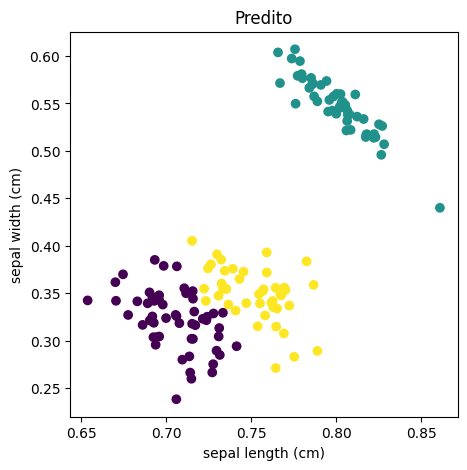

In [18]:
y_pred = KMeans(n_clusters = 3, random_state=0, n_init=10).fit_predict(X)
plot_predic(X, y_pred)

[Voltar ao sumário.](#topo)

### Parte 4: Comparando o resultado do agrupamento de "iris" com sua classificação real <a class="anchor" id="parte_04"></a>

Vamos plotar agora dois dos quatro atributos do conjunto de dados "iris" (os mesmos atributos plotados na parte anterior) e assim verificar a classificação original. Observe que o conjunto de dados não é linearmente separável mesmo quando consideramos somente esses dois atributos, o que tem implicações no resultado do k-médias que foi impresso anteriormente.

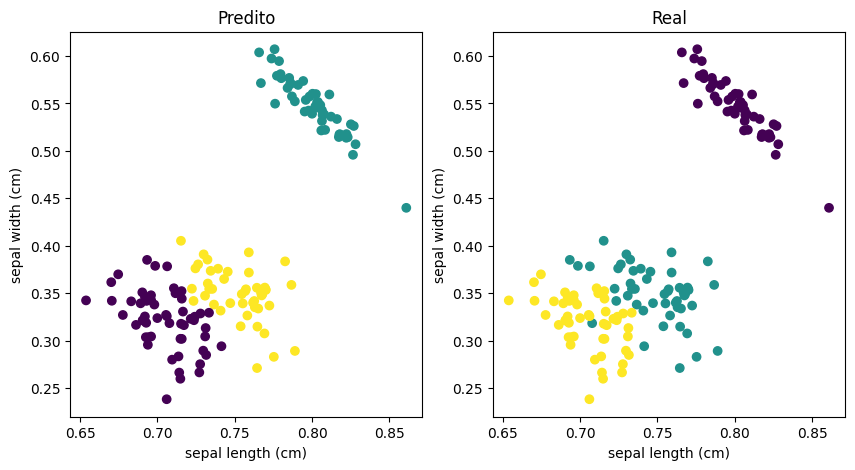

In [23]:
plot_real_vs_predito(X, y, y_pred)

[Voltar ao sumário.](#topo)

### Parte 5: Utilizando o k-médias como classificador <a class="anchor" id="parte_05"></a>
    
O experimento anterior sugere que, uma vez "treinado" os centróides com um conjunto razoável de dados, é possível utilizá-los para classificar dados não utilizados nesse "treinamento". Vamos verificar essa possibilidade rodando o k-médias para 2/3 dos pontos e classificando o 1/3 restante.

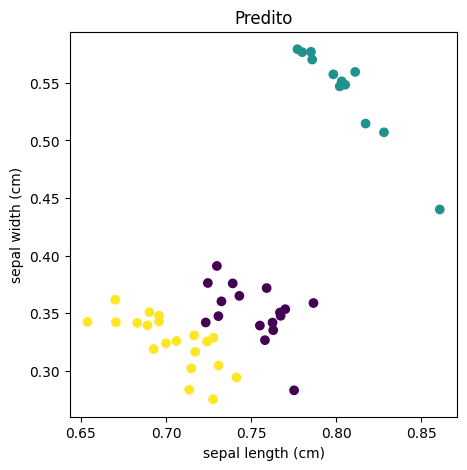

In [29]:
X_train = X[1:101]
X_test  = X[101:150]

kmeans = KMeans(n_clusters = 3, random_state=0, n_init=10).fit(X_train)

y_pred = kmeans.predict(X_test)

plot_predic(X_test, y_pred)

[Voltar ao sumário.](#topo)

### Parte 6: Implementando um agrupamento hierárquico aglomerativo <a class="anchor" id="parte_06"></a>

Esse tipo de agrupamento gera clusters do tipo:
    
\begin{equation*}
\{ \{ x_1, \{ x_2, x_3 \} \}, \{ \{ \{ x_4, x_5 \}, \{ x_6, x_7 \} \}, x_8 \} \}.
\end{equation*}

O nosso critério de aglomeração será o seguinte: para cada par de clusters, avaliamos a distância Euclidiana entre seus centróides, e os dois clusters que serão aglomerados na iteração corrente são os que minimizam essa distância.

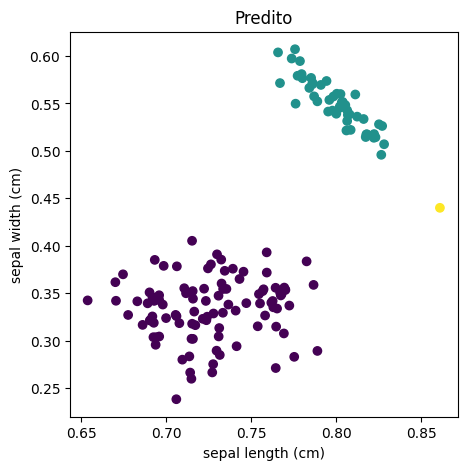

In [33]:
y_pred = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'average').fit_predict(X)
plot_predic(X, y_pred)

[Voltar ao sumário.](#topo)

